In [1]:

beg_year = 2014
end_year = 2020
tot_year = end_year - beg_year + 1
score_per_ac = 2500   

cor, scp, scr, X, Y, C, SW, SX, SY = ([] for i in range(9))
RN, AC, PA, WA, RE, CE, TL, OL, ML = ([] for i in range(9))

verdicts = ['Wrong Answer', 'Runtime Error', 'Compilation Error', 'Time Limit Exceeded', 'Output Limit Exceeded', 'Memory Limit Exceeded', 'Previously Accepted']
vcolors = ['#D71140', '#7C007C', '#FFFF00', '#268BE2', '#22FF00', '#2200FF', '#5A5A5A']

phases = []

for i in range (tot_year):
    filename = "res/out/" + str(beg_year + i) + ".txt"
    file = open(filename, "r")
    x, y, c = [], [], []
    for line in file:
        [n, u, v] = line.split()
        if (len(cor) == i):
            cor.append(float(n))
            scp.append(float(u) / score_per_ac)
            scr.append(float(v) / score_per_ac)
            continue
        x.append(float(u) / score_per_ac)
        y.append(float(v) / score_per_ac)
        c.append((float(v) - float(u)) / score_per_ac)
    X.append(x)
    Y.append(y)
    C.append(c)
    file.close()
    
for i in range (tot_year):
    filename = "res/out/sus" + str(beg_year + i) + ".txt"
    file = open(filename, "r")
    sw, sx, sy = [], [], []
    for line in file:
        [n, u, v] = line.split()
        sw.append(n)
        sx.append(float(u) / score_per_ac)
        sy.append(float(v) / score_per_ac)
    SW.append(sw)
    SX.append(sx)
    SY.append(sy)
    file.close()

for i in range (tot_year):
    filename = "res/out/vc" + str(beg_year + i) + ".txt"
    file = open(filename, "r")
    rn, ac, pa, wa, re, ce, tl, ml, ol = ([] for i in range(9))
    for line in file:
        ar = line.split()
        assert len(ar) == 9
        rn.append(int(ar[0]))
        ac.append(int(ar[1]))
        pa.append(int(ar[2]))
        wa.append(int(ar[3]))
        re.append(int(ar[4]))
        ce.append(int(ar[5]))
        tl.append(int(ar[6]))
        ml.append(int(ar[7]))
        ol.append(int(ar[8]))
    RN.append(rn)
    AC.append(ac)
    PA.append(pa)
    WA.append(wa)
    RE.append(re)
    CE.append(ce)
    TL.append(tl)
    ML.append(ml)
    OL.append(ol)
    file.close()
    
for i in range (tot_year):
    filename = "res/out/ph" + str(beg_year + i) + ".txt"
    file = open(filename, "r")
    ac, wa, re, ce, tl, ml, ol = ([] for i in range(7))
    for line in file:
        ar = line.split()
        assert len(ar) == 7
        ac.append(int(ar[0]))
        wa.append(int(ar[1]))
        re.append(int(ar[2]))
        ce.append(int(ar[3]))
        tl.append(int(ar[4]))
        ml.append(int(ar[5]))
        ol.append(int(ar[6]))
    now = []
    now.append(ac)
    now.append(wa)
    now.append(re)
    now.append(ce)
    now.append(tl)
    now.append(ml)
    now.append(ol)
    phases.append(now)
    file.close()


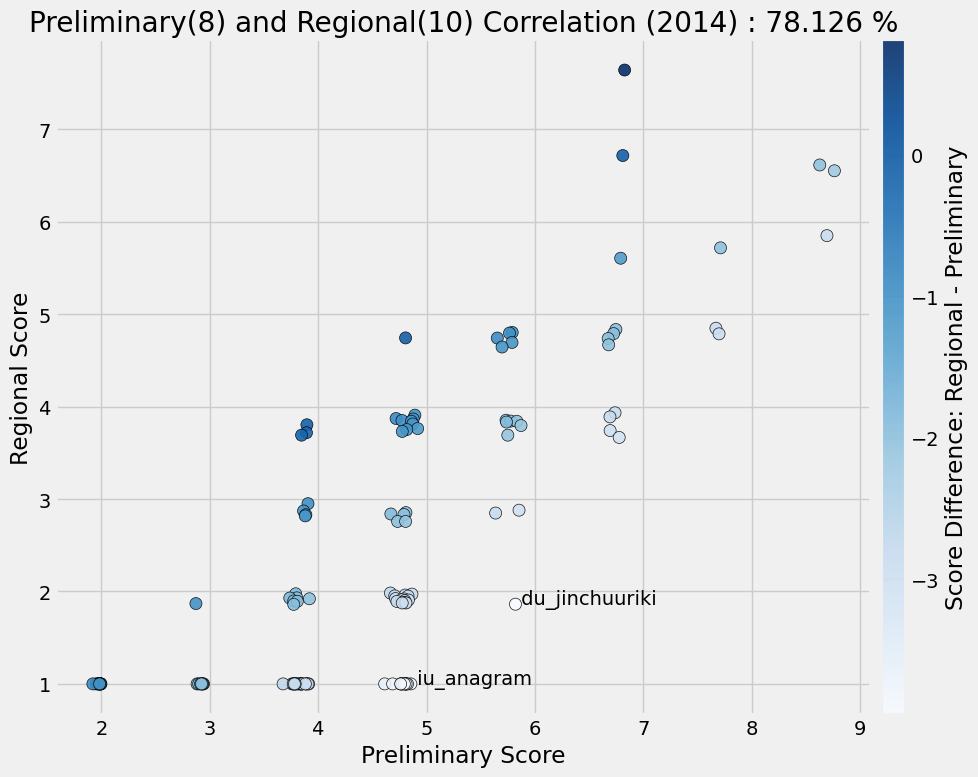

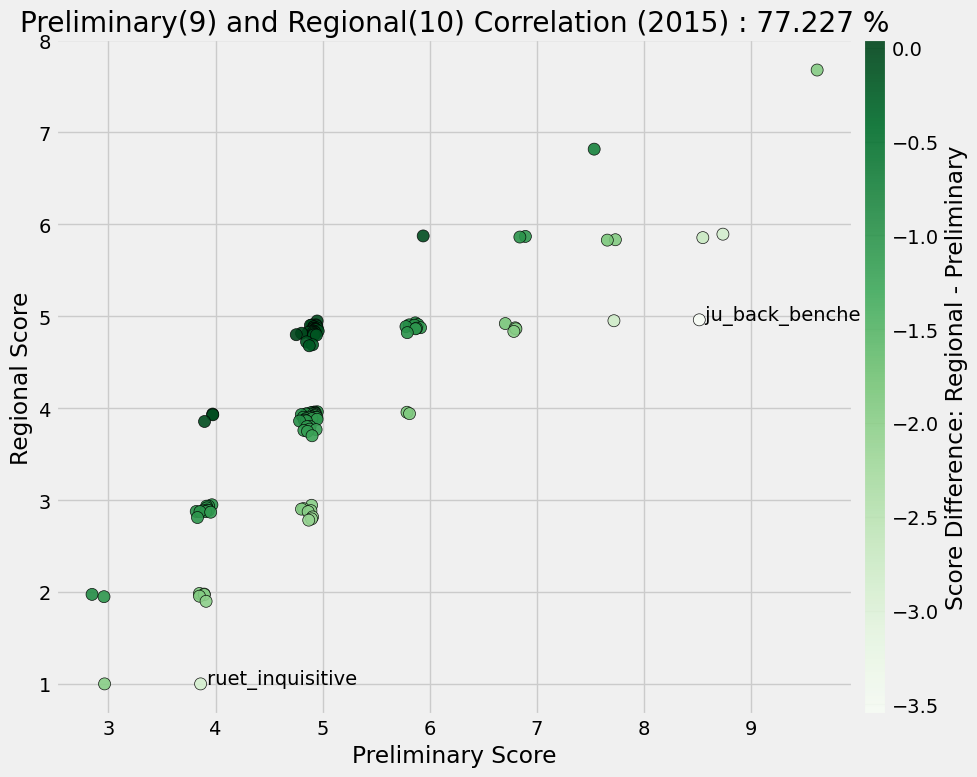

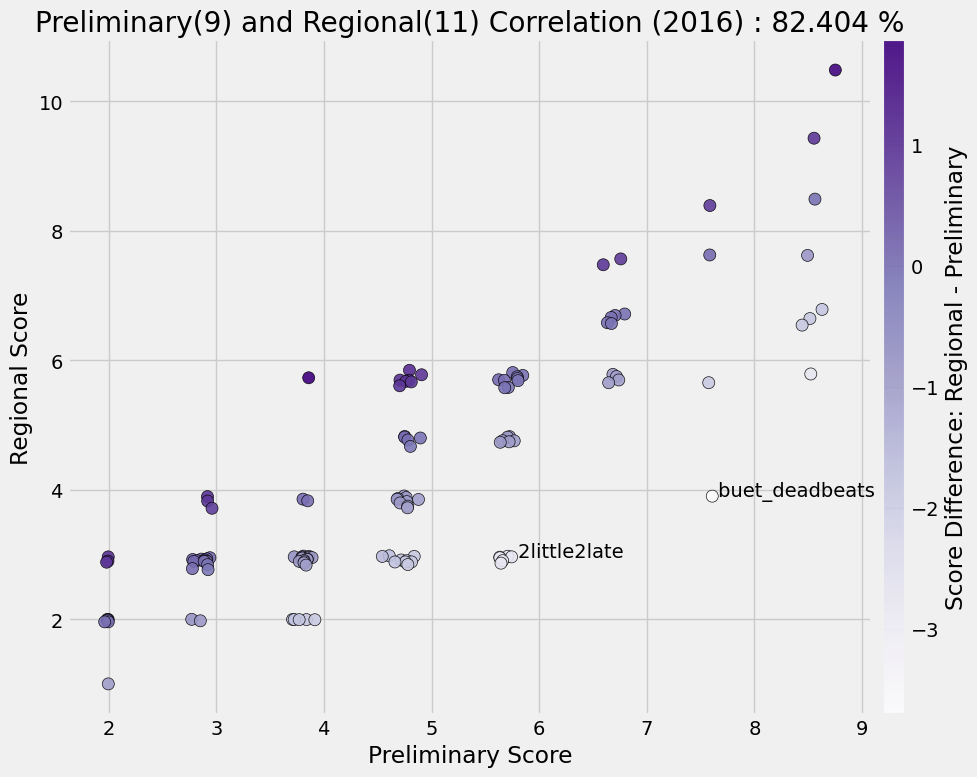

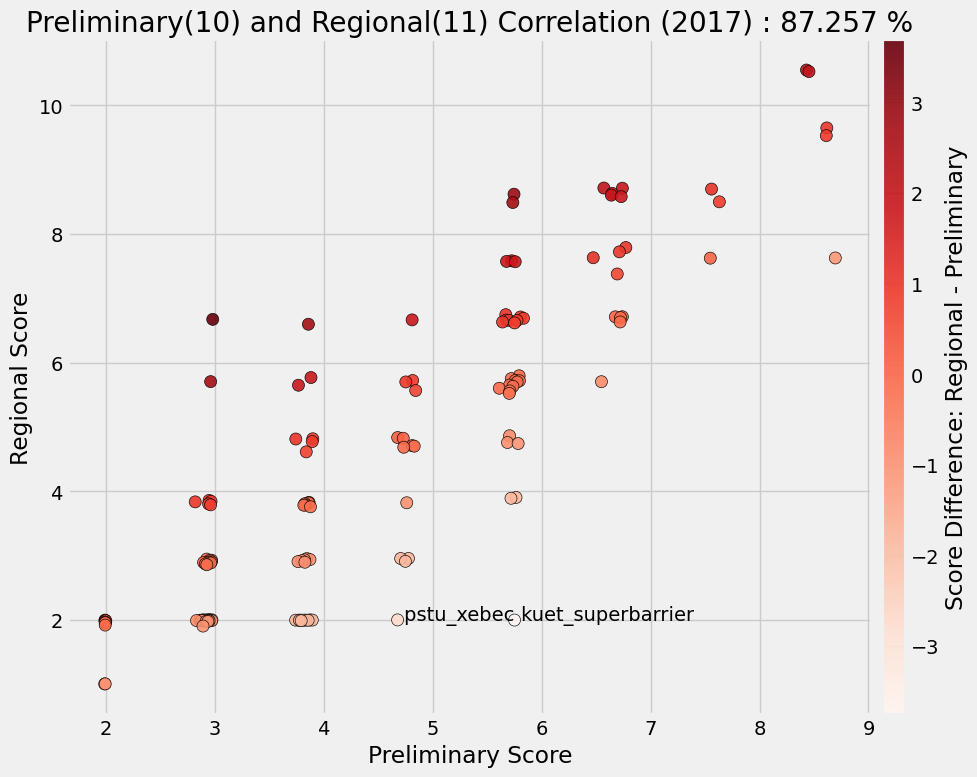

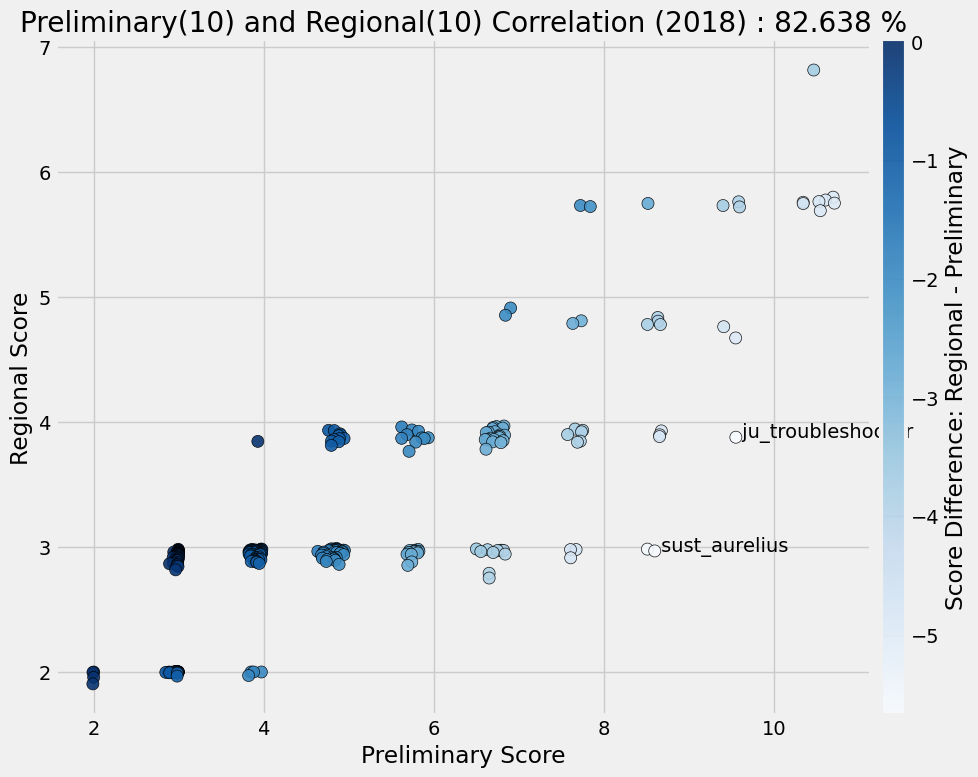

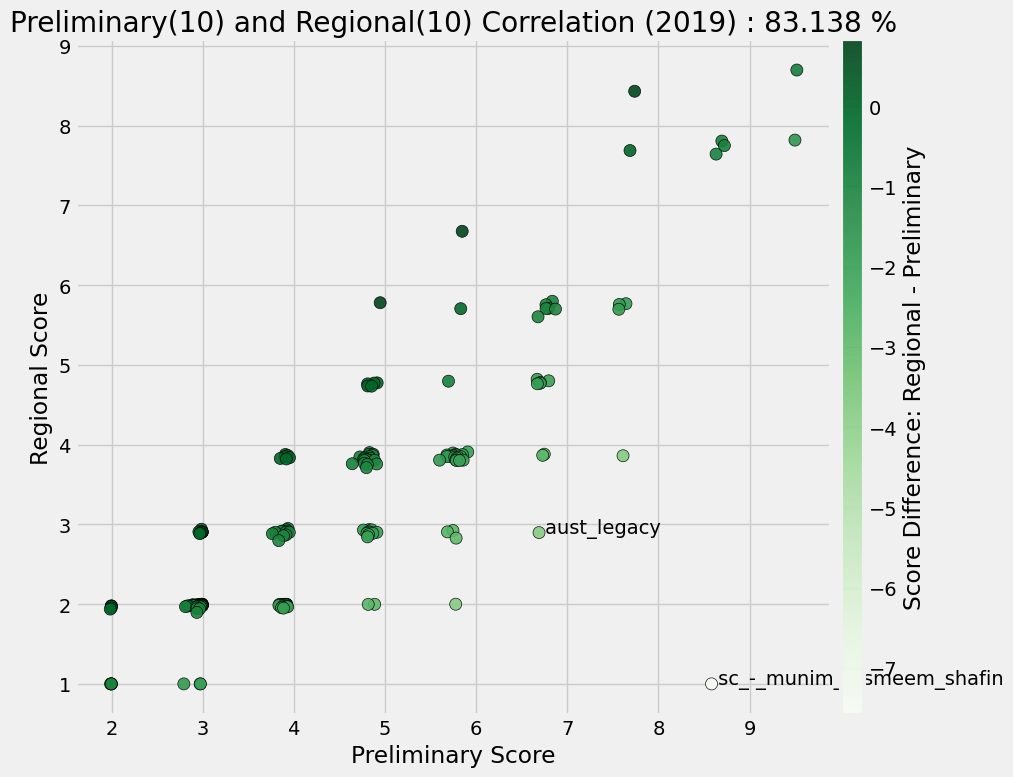

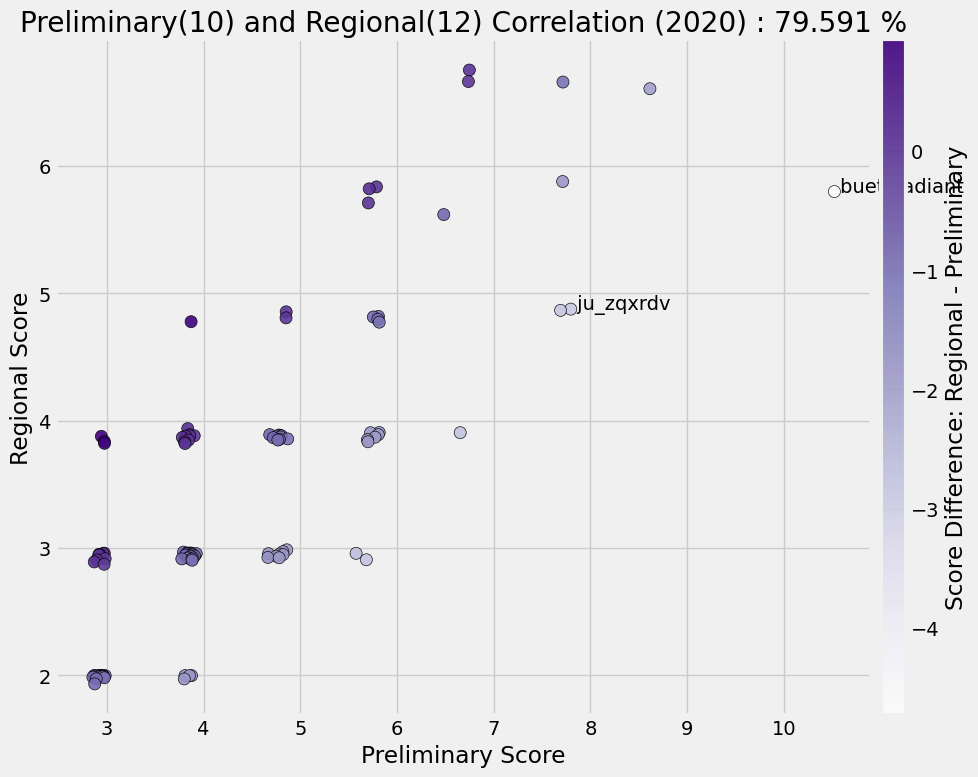

In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Cmap = ['Blues', 'Greens', 'Purples', 'Reds']
plt.style.use("fivethirtyeight")

for t in range (tot_year):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    
    ax.set_title("Preliminary(" + str(int(scp[t])) + ") and Regional(" + str(int(scr[t])) + ") Correlation (" + str(beg_year + t) + ") : " + str(cor[t]) + " %")
    ax.set_xlabel("Preliminary Score")
    ax.set_ylabel("Regional Score")

    loc = make_axes_locatable(ax)
    cax = loc.append_axes('right', size = '3%', pad = 0.1)
    
    scat = ax.scatter(X[t], Y[t], s = 75, c = C[t], cmap = Cmap[t & 3], alpha = 0.9, edgecolor = 'black', linewidth = 0.5)
    
    for i in range(len(SW[t])):
        ax.annotate(" " + SW[t][i], (SX[t][i], SY[t][i]))
    
    cbar = plt.colorbar(scat, cax = cax, orientation = 'vertical')
    cbar.set_label("Score Difference: Regional - Preliminary")

    plt.tight_layout()
    plt.show()
    

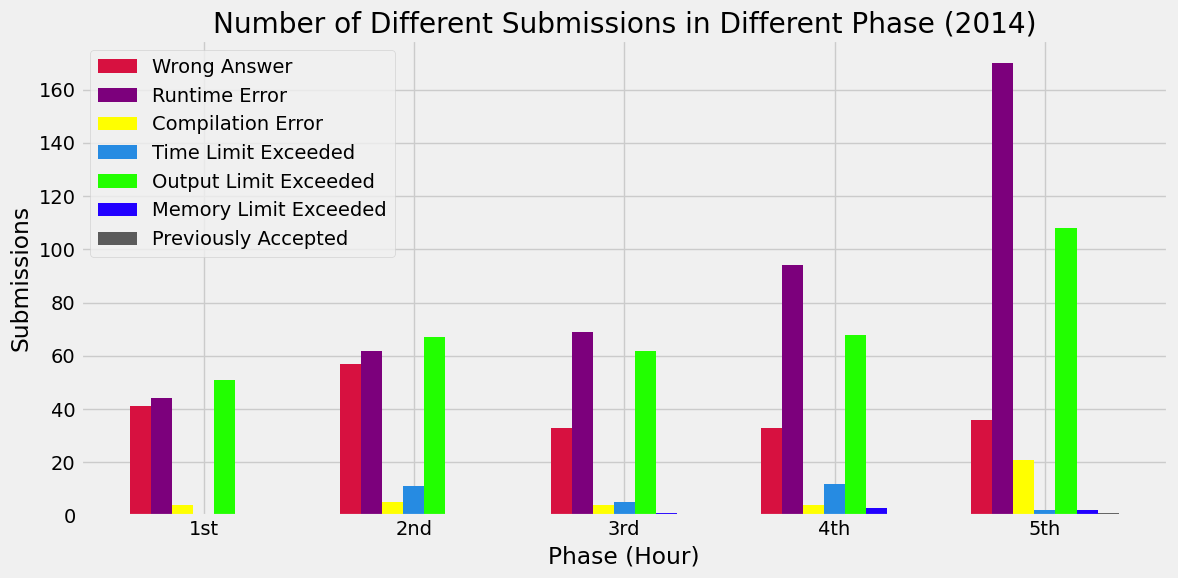

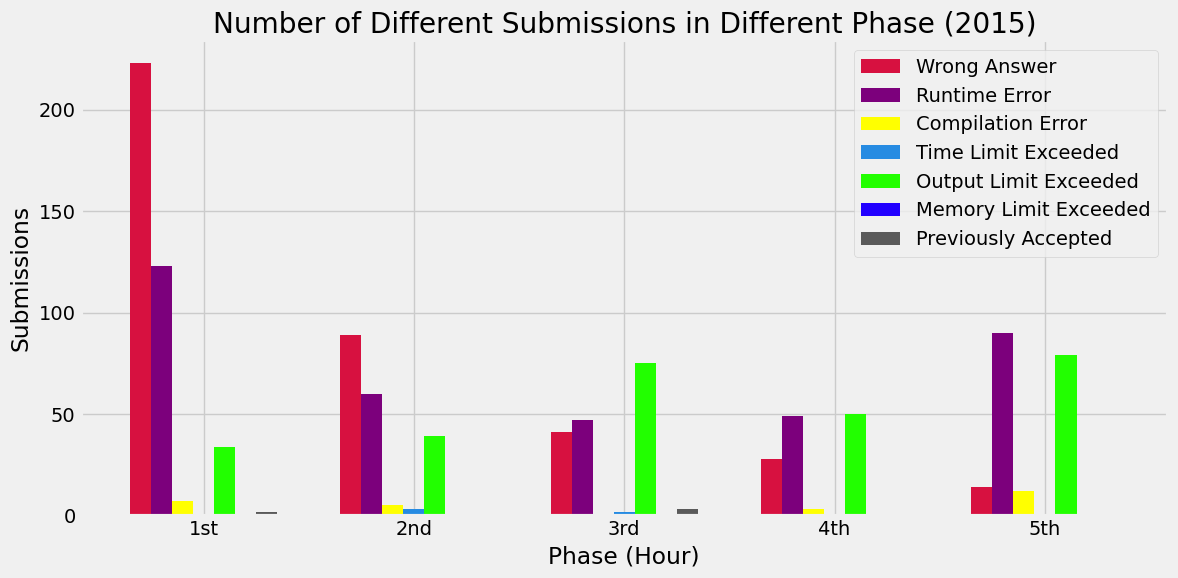

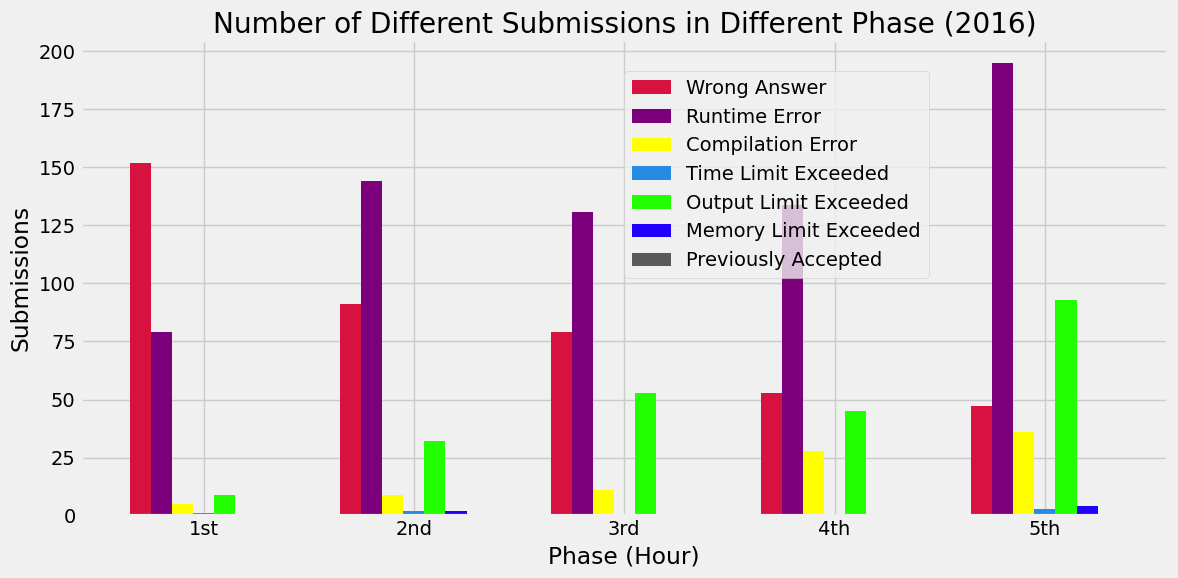

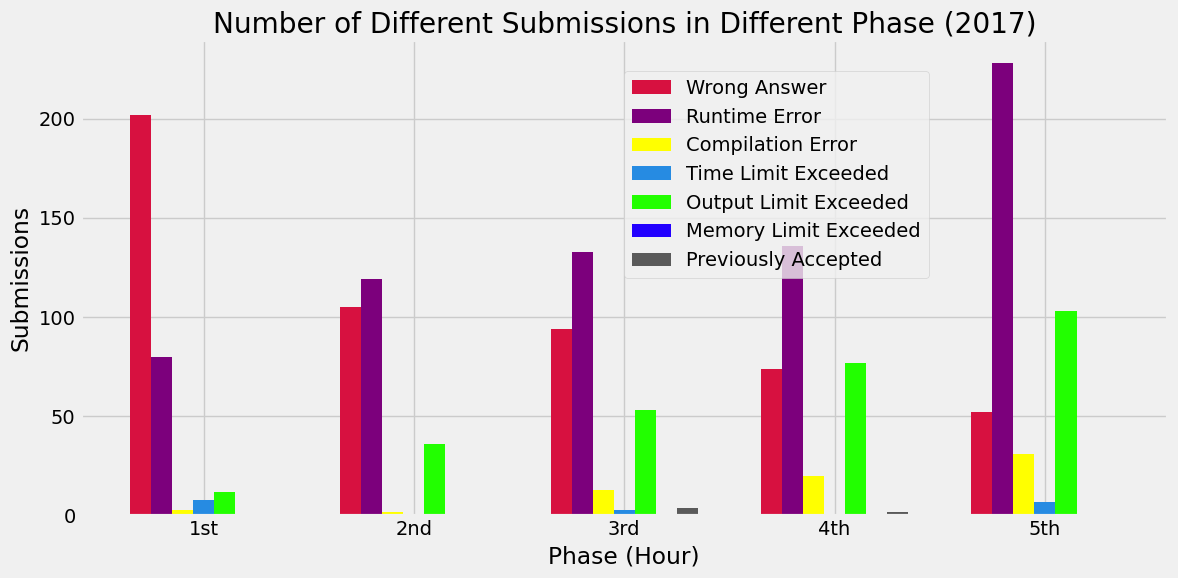

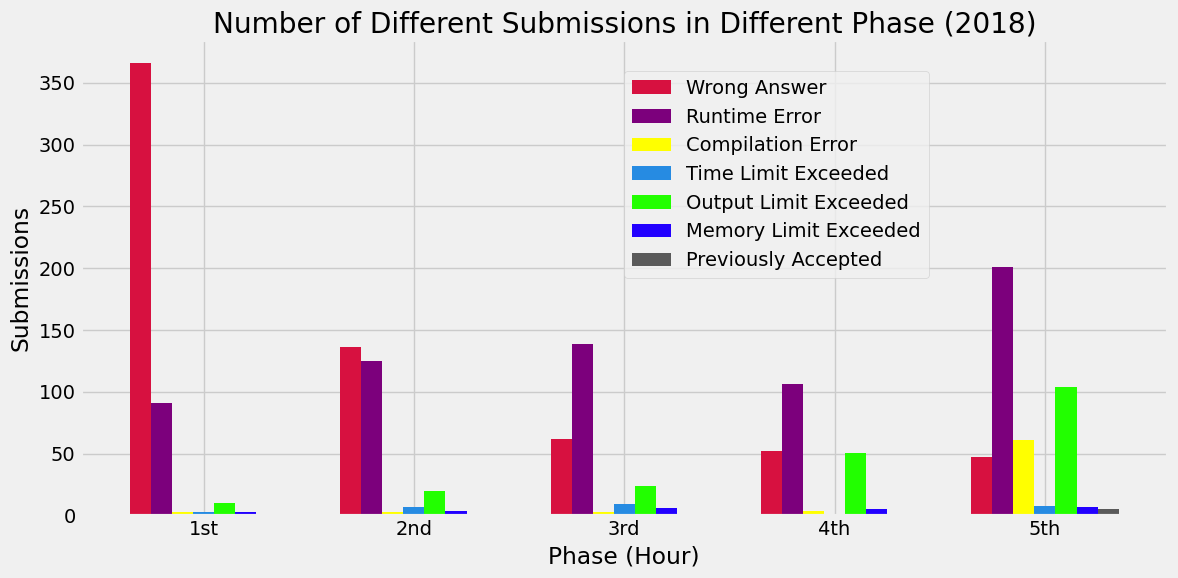

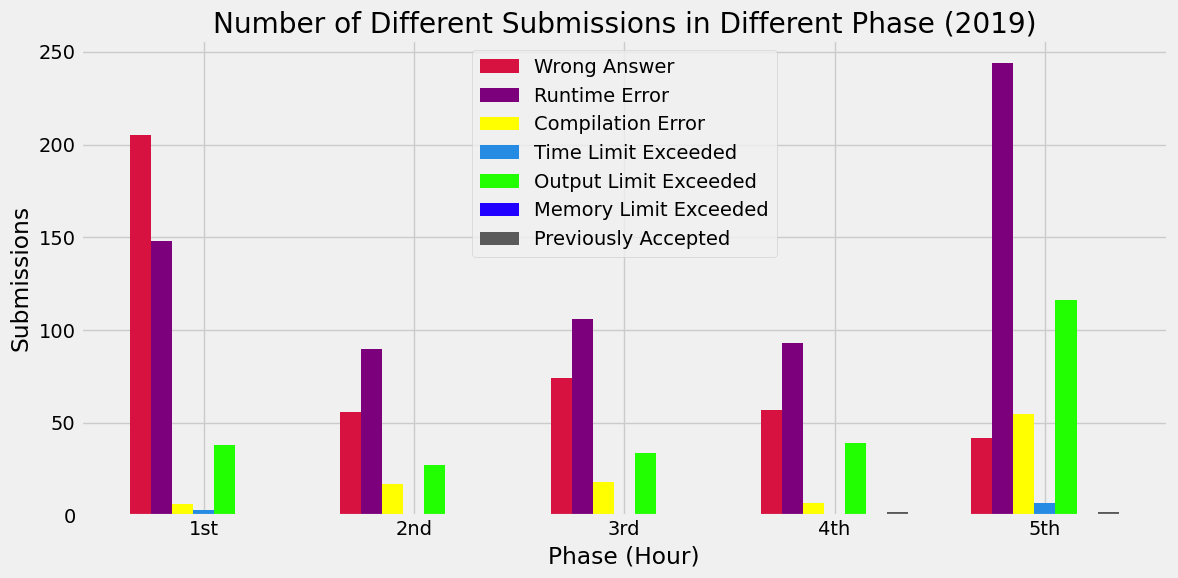

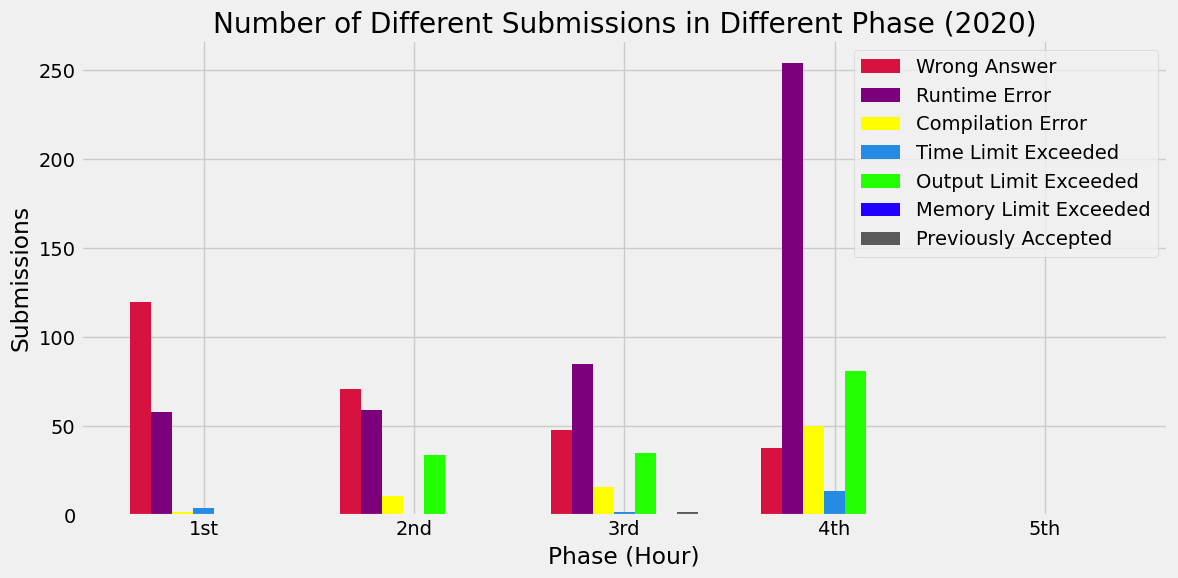

In [3]:

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

phase_cnt = ['1st', '2nd', '3rd', '4th', '5th']
phase_indexes = np.arange(len(phase_cnt))
bar_width = 0.1

for t in range (tot_year):
    fig = plt.figure(figsize = (12, 6))
    ax = fig.add_subplot(111)
    
    for i in range (7):
        ax.bar(phase_indexes + bar_width * (i - 3), phases[t][i], width = bar_width, color = vcolors[i], label = verdicts[i])

    if (t >= 2 and t < 5):
        ax.legend(loc = (0.5, 0.5))
    else:
        ax.legend()
        
    plt.xticks(ticks = phase_indexes, labels = phase_cnt)
    
    ax.set_title('Number of Different Submissions in Different Phase (' + str(beg_year + t) + ')')
    ax.set_xlabel('Phase (Hour)')
    ax.set_ylabel('Submissions')
    
    plt.tight_layout()
    plt.show


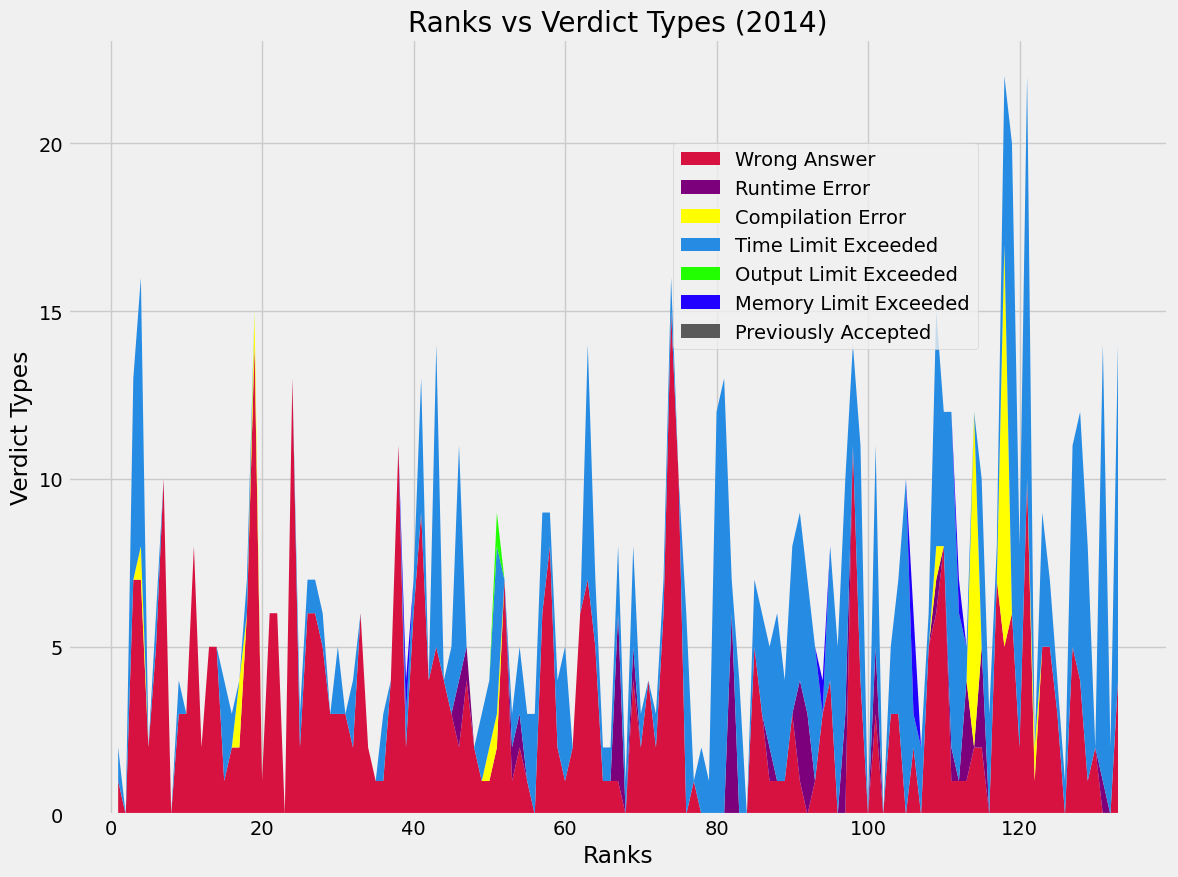

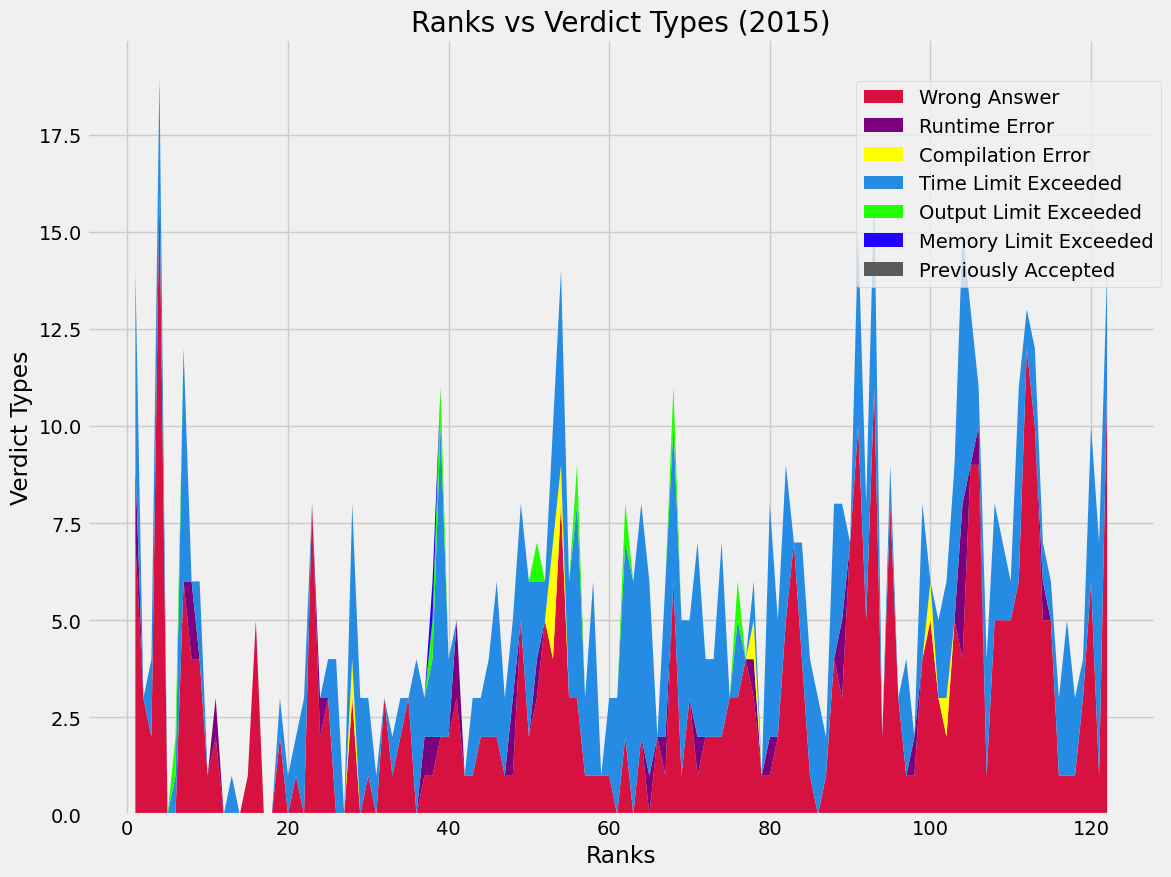

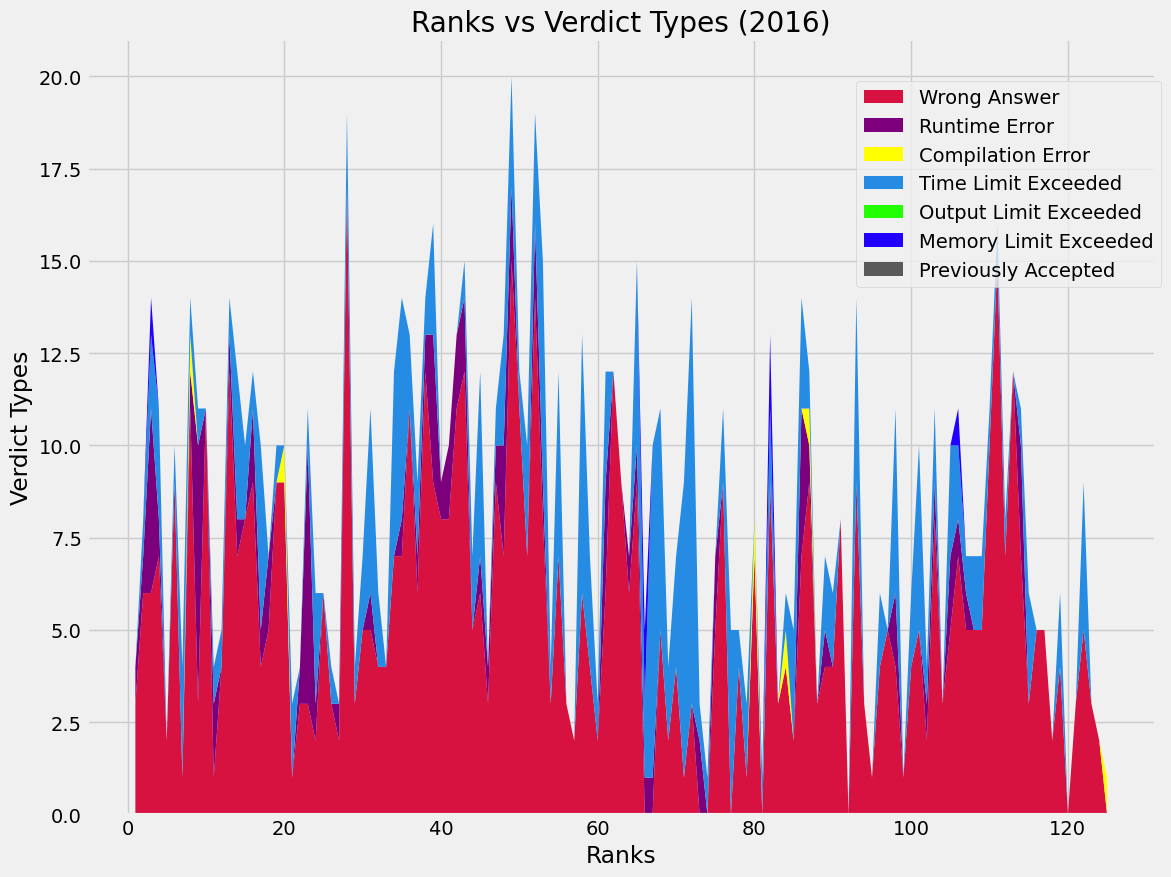

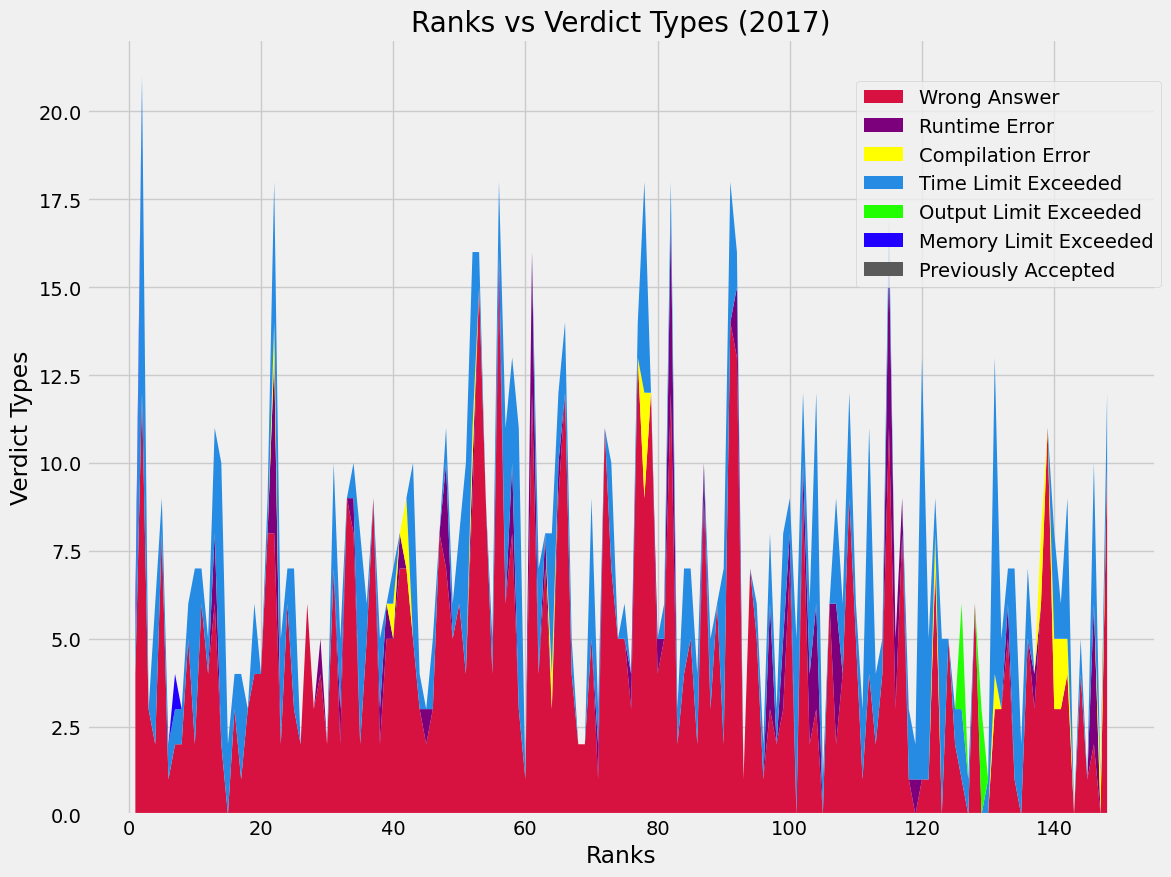

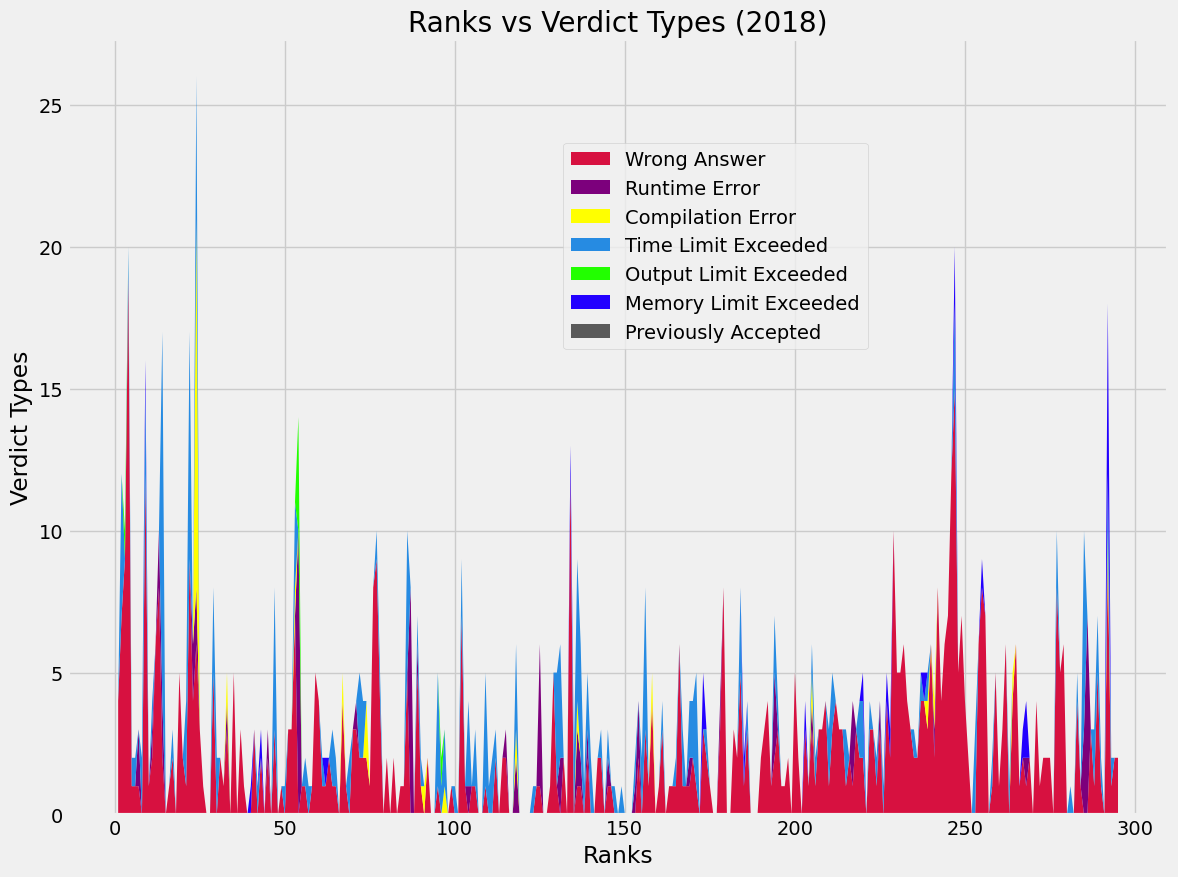

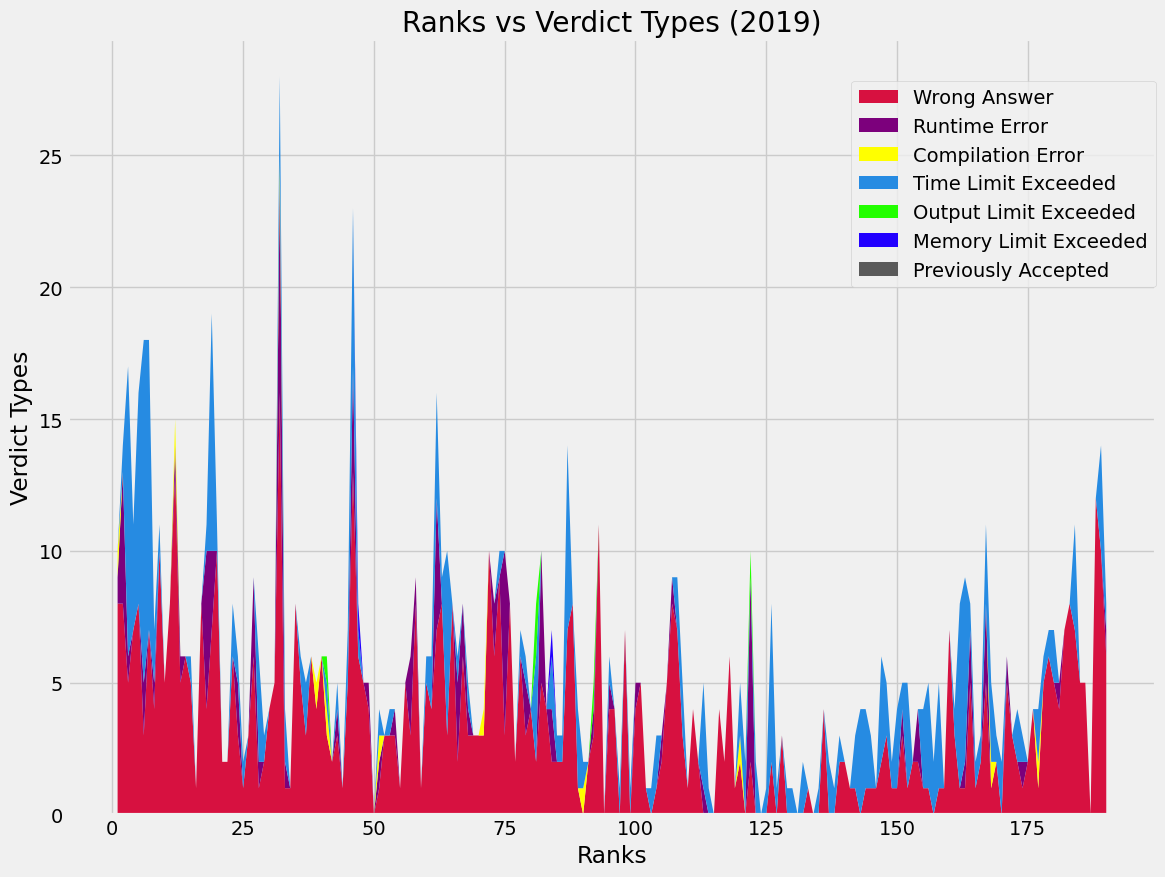

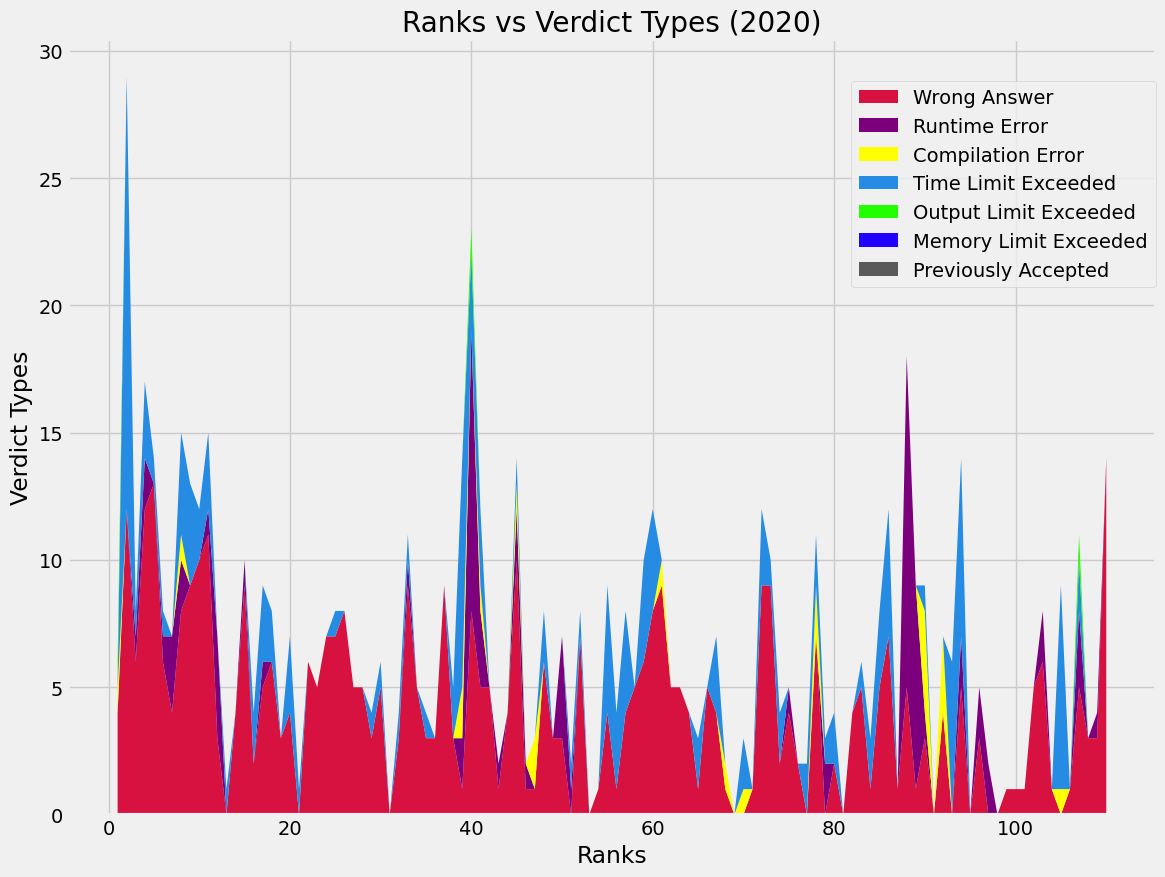

In [4]:

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

for t in range (tot_year):
    fig = plt.figure(figsize = (12, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title("Ranks vs Verdict Types (" + str(beg_year + t) + ")")
    ax.set_xlabel("Ranks")
    ax.set_ylabel("Verdict Types")
    
    ax.stackplot(RN[t], WA[t], RE[t], CE[t], TL[t], OL[t], ML[t], PA[t], labels = verdicts, colors = vcolors)
    
    if (t == 0):
        ax.legend(loc = (0.55, 0.6))
    elif (t == 4):
        ax.legend(loc = (0.45, 0.6))
    else:
        ax.legend(loc = (0.72, 0.68))
        
    plt.tight_layout()
    plt.show()
